In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display the first few rows of each dataset
print("Customers Dataset")
print(customers.head())

print("\nProducts Dataset")
print(products.head())

print("\nTransactions Dataset")
print(transactions.head())


Customers Dataset
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      


Missing Values in Customers Dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products Dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Summary Statistics for Customers Dataset:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Summary Statistics for Products Dataset:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                    

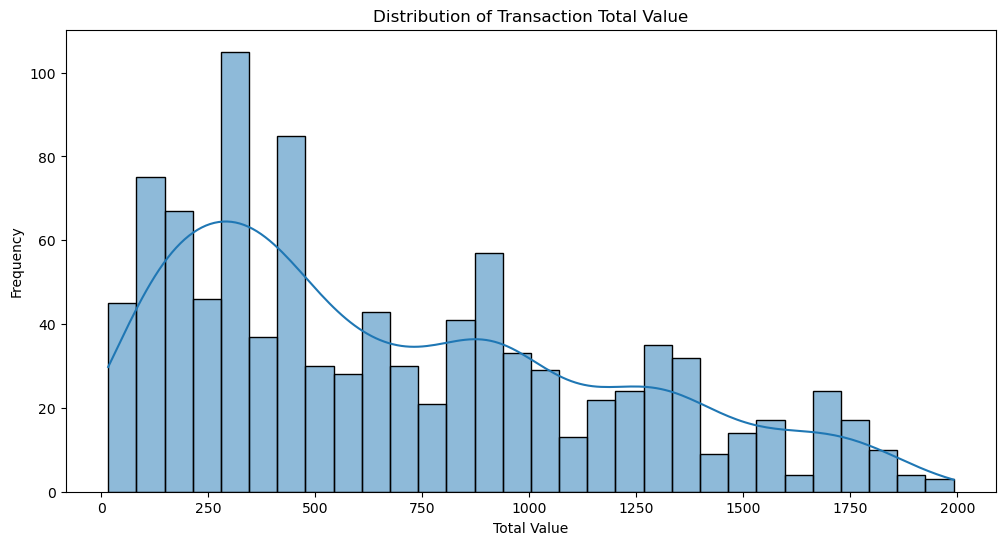

In [2]:
# Check for missing values
print("\nMissing Values in Customers Dataset:")
print(customers.isnull().sum())

print("\nMissing Values in Products Dataset:")
print(products.isnull().sum())

print("\nMissing Values in Transactions Dataset:")
print(transactions.isnull().sum())

# Summary statistics
print("\nSummary Statistics for Customers Dataset:")
print(customers.describe(include='all'))

print("\nSummary Statistics for Products Dataset:")
print(products.describe(include='all'))

print("\nSummary Statistics for Transactions Dataset:")
print(transactions.describe(include='all'))

# Visualize data distribution for numerical features
plt.figure(figsize=(12, 6))
sns.histplot(transactions['TotalValue'], bins=30, kde=True)
plt.title("Distribution of Transaction Total Value")
plt.xlabel("Total Value")
plt.ylabel("Frequency")
plt.show()

In [13]:
#Insight 1: Top-selling product categories
top_categories = transactions.merge(products, on='ProductID') \
                              .groupby('Category')['TotalValue'] \
                              .sum().sort_values(ascending=False)
print("Top-Selling Product Categories:")
print(top_categories)

#Insight 2: Revenue by region
region_revenue = transactions.merge(customers, on='CustomerID') \
                              .groupby('Region')['TotalValue'] \
                              .sum().sort_values(ascending=False)
print("\nRevenue by Region:")
print(region_revenue)

#Insight 3: Most loyal customers (highest transactions)
loyal_customers = transactions.groupby('CustomerID')['TotalValue'] \
                               .sum().sort_values(ascending=False).head(10)
print("\nTop 10 Loyal Customers:")
print(loyal_customers)

#Insight 4: Top 10 Customers by Average Transaction Value
avg_transaction_value = transactions.groupby('CustomerID')['TotalValue'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Average Transaction Value:")
print(avg_transaction_value)

#Insight 5: Product Categories by Purchase Frequency
category_frequency = transactions.merge(products, on='ProductID') \
                                  .groupby('Category')['Quantity'] \
                                  .sum().sort_values(ascending=False)
print("\nProduct Categories by Purchase Frequency:")
print(category_frequency)

#Insight 6: Percentage of Repeat Customers
repeat_customers = transactions.groupby('CustomerID')['TransactionID'].nunique().value_counts()
repeat_percentage = (repeat_customers[repeat_customers.index > 1].sum() / repeat_customers.sum()) * 100
print(f"\nPercentage of Repeat Customers: {repeat_percentage:.2f}%")


Top-Selling Product Categories:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64

Revenue by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64

Top 10 Loyal Customers:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64

Top 10 Customers by Average Transaction Value:
CustomerID
C0040    1323.133333
C0089    1278.110000
C0066    1266.426667
C0168    1263.457500
C0196    1245.720000
C0096    1214.584000
C0114    1156.086000
C0185    1141.440000
C0138    1122.050000
C0148    1091.558000
Name: TotalValue, dtype: float64

Product Categories by Purchase Frequency:
Category
Books          681
Home Decor     639
Electronics    62

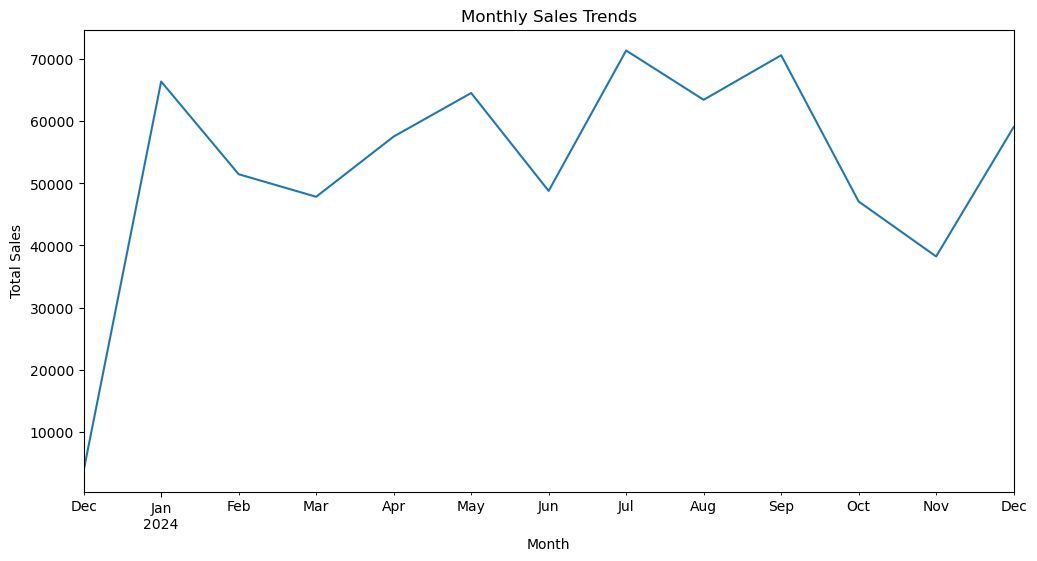

In [14]:
# Convert date column to datetime format if available
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Group by month and calculate total sales
monthly_sales = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

# Plot the sales trend
monthly_sales.plot(kind='line', title='Monthly Sales Trends', xlabel='Month', ylabel='Total Sales', figsize=(12, 6))
plt.show()
